In [1]:
# install_certifi.py
#
# sample script to install or update a set of default Root Certificates
# for the ssl module.  Uses the certificates provided by the certifi package:
#       https://pypi.python.org/pypi/certifi

# import os
# import os.path
# import ssl
# import stat
# import subprocess
# import sys

# STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
#              | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
#              | stat.S_IROTH |                stat.S_IXOTH )


# def main():
#     openssl_dir, openssl_cafile = os.path.split(
#         ssl.get_default_verify_paths().openssl_cafile)

#     print(" -- pip install --upgrade certifi")
#     subprocess.check_call([sys.executable,
#         "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])

#     import certifi

    # change working directory to the default SSL directory
#     os.chdir(openssl_dir)
#     relpath_to_certifi_cafile = os.path.relpath(certifi.where())
#     print(" -- removing any existing file or link")
#     try:
#         os.remove(openssl_cafile)
#     except FileNotFoundError:
#         pass
#     print(" -- creating symlink to certifi certificate bundle")
#     os.symlink(relpath_to_certifi_cafile, openssl_cafile)
#     print(" -- setting permissions")
#     os.chmod(openssl_cafile, STAT_0o775)
#     print(" -- update complete")

# if __name__ == '__main__':
#     main()

In [2]:
!ls
!pwd

14 Days                        README.md
180 Days                       RMSE_30_Days
30_Days                        Seasonality_Comparison
90 Days                        Untitled.ipynb
COVID-19_Stay_at_home.ipynb    World Data Stay at home order
Cluster.xlsx                   cleaned_covid_19_test_df
Country_Policy.csv             dataset
Covid-19-Test-Processing.ipynb index.html
DaskTest.ipynb                 prophet-master
LICENSE                        stay_home
Policies_Datset.ipynb          test.py
Prophet Demo.ipynb             testfile.py
Prophet_Covid_Analysis.ipynb
/Users/yukon/desktop/covid-project


In [3]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [4]:
stay_at_home_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [5]:
stay_at_home_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [6]:
stay_at_home_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [7]:
cleaned_stay_at_home_df = stay_at_home_df[['location','date','total_cases','total_tests','stringency_index','positive_rate','total_deaths']]

In [8]:
cleaned_stay_at_home_df

,location,date,total_cases,total_tests,stringency_index,positive_rate,total_deaths
0,Afghanistan,2019-12-31,0.0,NaN,NaN,NaN,0.0
1,Afghanistan,2020-01-01,0.0,NaN,0.0,NaN,0.0
2,Afghanistan,2020-01-02,0.0,NaN,0.0,NaN,0.0
3,Afghanistan,2020-01-03,0.0,NaN,0.0,NaN,0.0
4,Afghanistan,2020-01-04,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...
42431,International,2020-09-04,696.0,NaN,NaN,NaN,7.0
42432,International,2020-09-05,696.0,NaN,NaN,NaN,7.0
42433,International,2020-09-06,696.0,NaN,NaN,NaN,7.0
42434,International,2020-09-07,696.0,NaN,NaN,NaN,7.0


In [9]:
cleaned_stay_at_home_df['cases_per_tests_ratio'] = cleaned_stay_at_home_df['total_cases']/cleaned_stay_at_home_df['total_tests']

/Users/yukon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
cleaned_stay_at_home_df

,location,date,total_cases,total_tests,stringency_index,positive_rate,total_deaths,cases_per_tests_ratio
0,Afghanistan,2019-12-31,0.0,NaN,NaN,NaN,0.0,NaN
1,Afghanistan,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN
2,Afghanistan,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN
4,Afghanistan,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
42431,International,2020-09-04,696.0,NaN,NaN,NaN,7.0,NaN
42432,International,2020-09-05,696.0,NaN,NaN,NaN,7.0,NaN
42433,International,2020-09-06,696.0,NaN,NaN,NaN,7.0,NaN
42434,International,2020-09-07,696.0,NaN,NaN,NaN,7.0,NaN


In [11]:
cleaned_stay_at_home_df.dtypes

location                  object
date                      object
total_cases              float64
total_tests              float64
stringency_index         float64
positive_rate            float64
total_deaths             float64
cases_per_tests_ratio    float64
dtype: object

In [12]:
groupby_location_df = cleaned_stay_at_home_df.groupby('location',as_index=False)
separated_location_df = dict(iter(groupby_location_df))

In [13]:
del separated_location_df['Hong Kong']

In [101]:
RMSE_Df = {}
Predicted_Df = {}

def plot_metrics(forecast_cv,imgname):
    mse_plot = plot_cross_validation_metric(forecast_cv, metric = 'mse')
    mse_plot.suptitle(f'{location}_mse_{imgname}',y=0.95)
    mse_plot.savefig(f'./Seasonality_Comparison/{location}_mse_{imgname}')
                      
    rmse_plot =plot_cross_validation_metric(forecast_cv, metric = 'rmse')
    rmse_plot.suptitle(f'{location}_rmse_{imgname}',y=0.95)
    rmse_plot.savefig(f'./Seasonality_Comparison/{location}_rmse_{imgname}')
                      
    mae_plot = plot_cross_validation_metric(forecast_cv, metric = 'mae')
    mae_plot.suptitle(f'{location}_mae_{imgname}',y=0.95)
    mae_plot.savefig(f'./Seasonality_Comparison/{location}_mae_{imgname}')
                      
    mape_plot = plot_cross_validation_metric(forecast_cv, metric = 'mape')
    mae_plot.suptitle(f'{location}_mape_{imgname}',y=0.95)
    mae_plot.savefig(f'./Seasonality_Comparison/{location}_mape_{imgname}')
                      
                      
def plot_forecast(forecast,m, img_name):
    forecastplot = m.plot(forecast)
    forecastplot.suptitle(f'{location}_forecast_{img_name}',y=0.95)
    forecastplot.savefig(f'./Seasonality_Comparison/{location}_forecast_{img_name}')
    
    plot_components = m.plot_components(forecast)
    plot_components.suptitle(f'{location}_components_{img_name}',y=0.95)
    plot_components.savefig(f'./Seasonality_Comparison/{location}_components_{img_name}')
                             
                             

def prophet_predicts(location_df,location, yearly_seasonality, weekly_seasonality):
    print(location_df.columns)
    num_rows = str(location_df.shape[0] - 31) + ' days'
    prophet_df = location_df[['date','total_cases']]
    prophet_df = prophet_df.rename(columns={'date':'ds','total_cases': 'y'})
    m = Prophet(interval_width = 0.95, yearly_seasonality = yearly_seasonality, weekly_seasonality = weekly_seasonality)
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    forecast_cv = cross_validation(m, initial = num_rows, period = '30 days', horizon = '30 days' ) # of rows - 31 days
#     forecast_pf = performance_metrics(forecast_cv)
    
    img_name = 'daily.png'
    if(yearly_seasonality):
        img_name = 'yearly_' + img_name
        
    if(weekly_seasonality):
        img_name = 'weekly_' + img_name
    
    plot_forecast(forecast,m, img_name)
    plot_metrics(forecast_cv, img_name)
    

    #plot_plotly(m, forecast)
    #plot_components_plotly(m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00
/Users/yukon/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:487: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/Users/yukon/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:487: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor='w', figsize=figsize)
/Users/yukon/opt/anaconda3/lib/python3.7/site-packages/fbprophet/plot.py:487: RuntimeWarning: More than 2

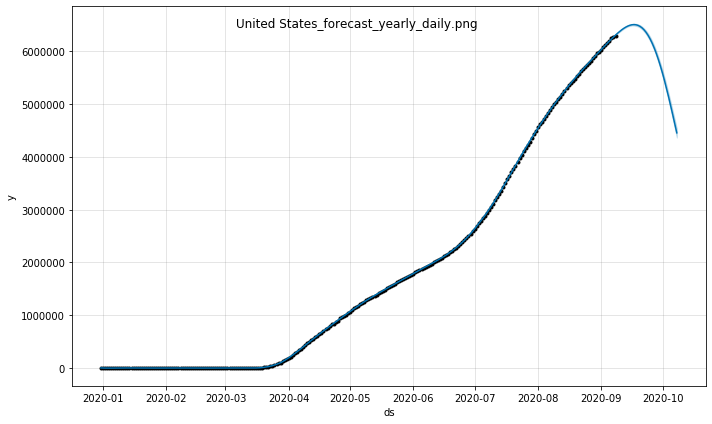

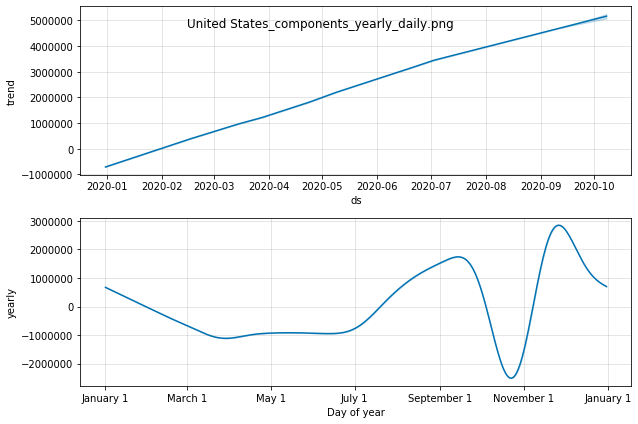

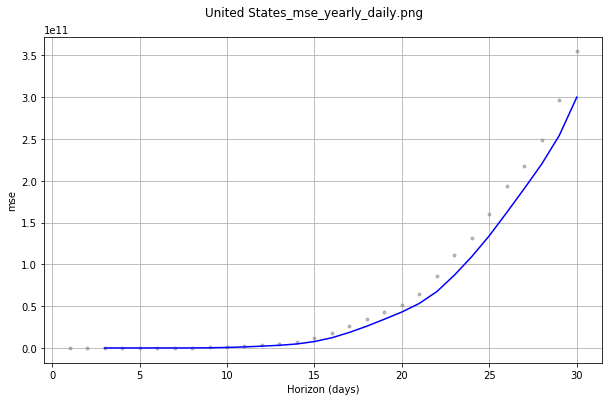

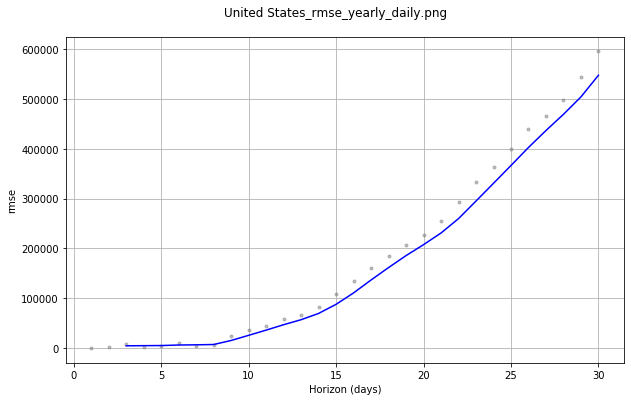

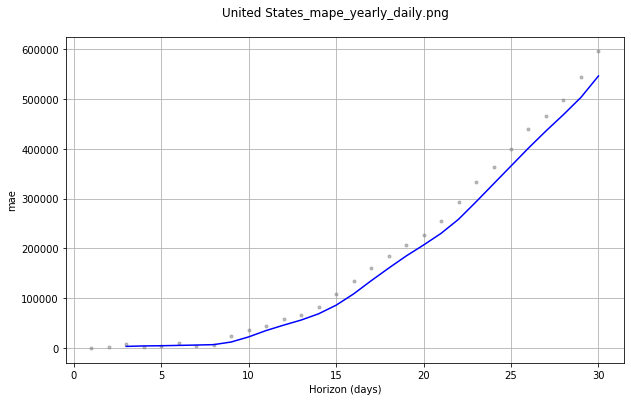

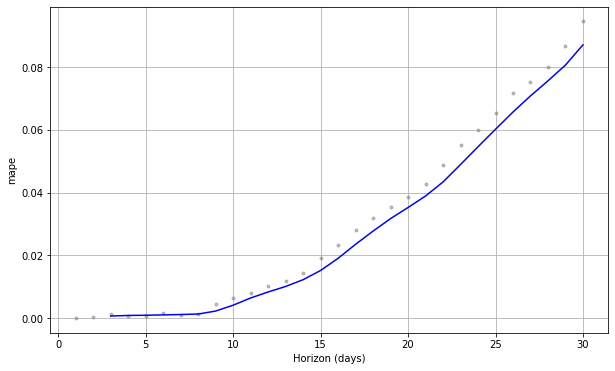

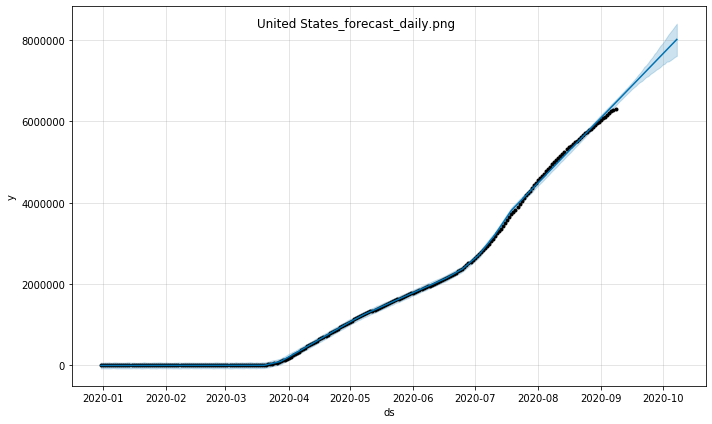

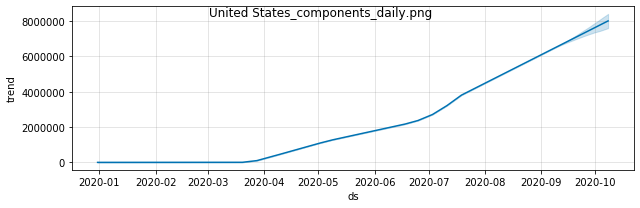

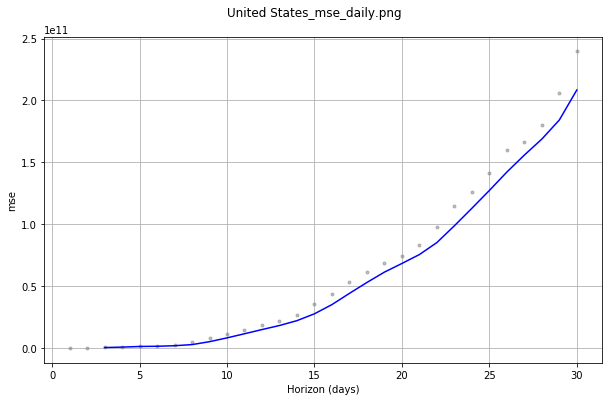

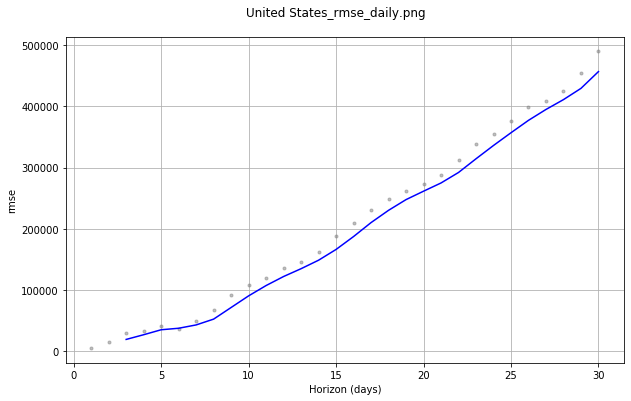

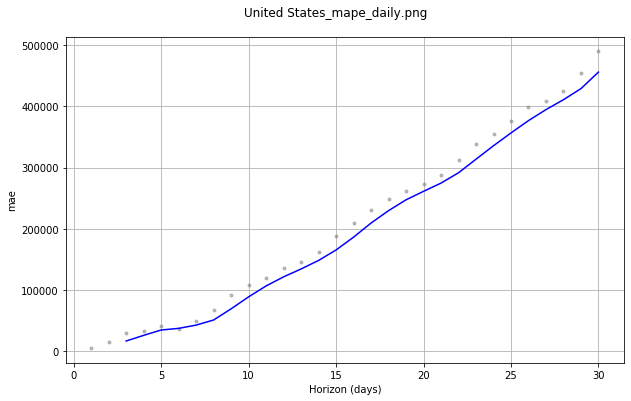

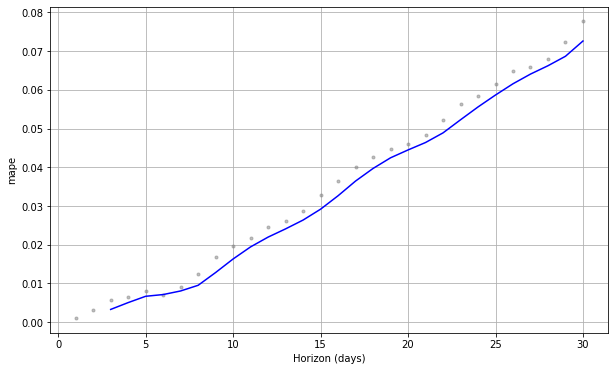

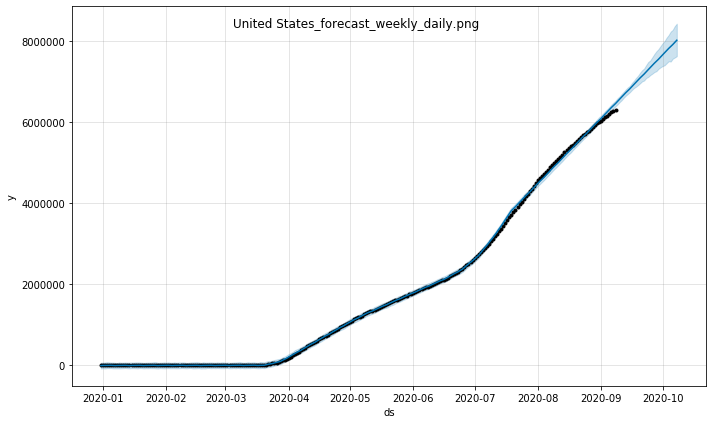

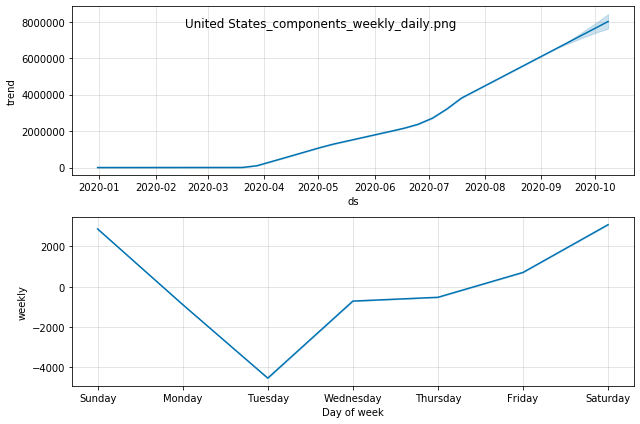

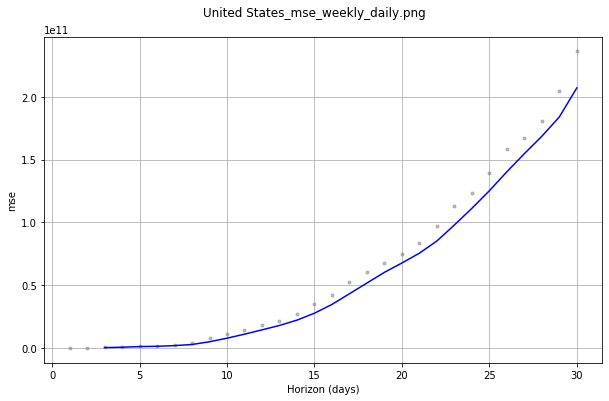

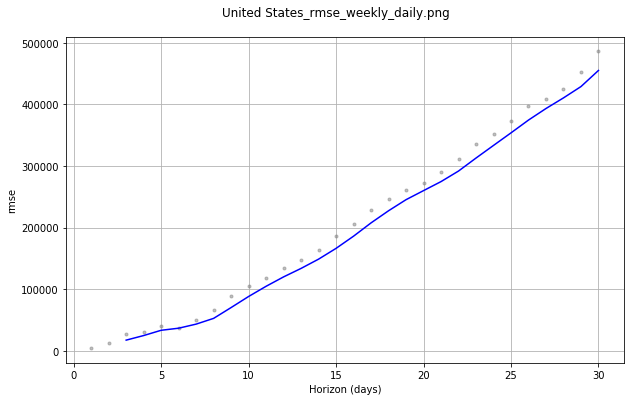

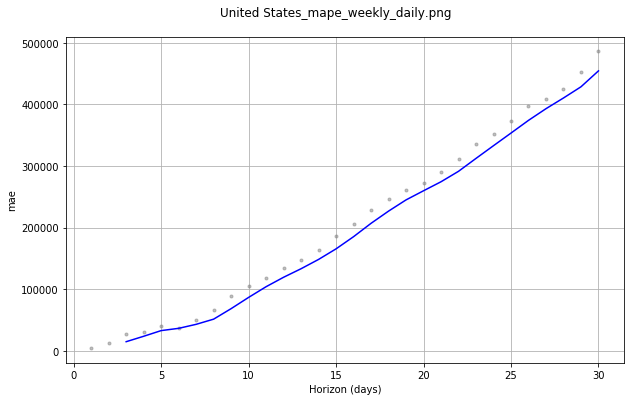

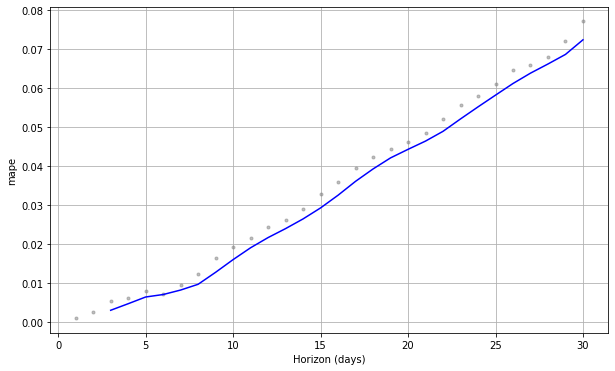

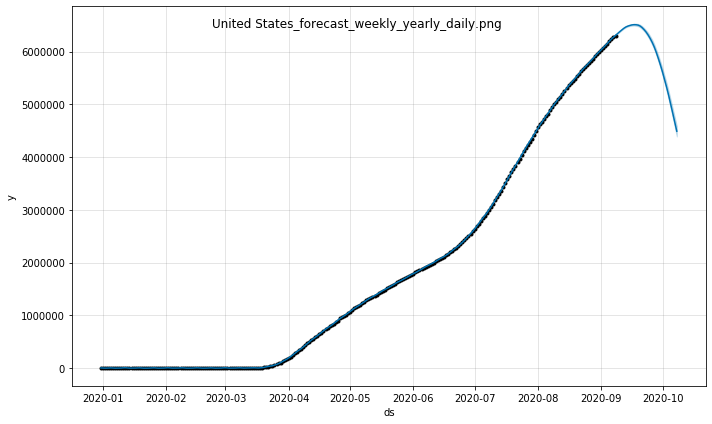

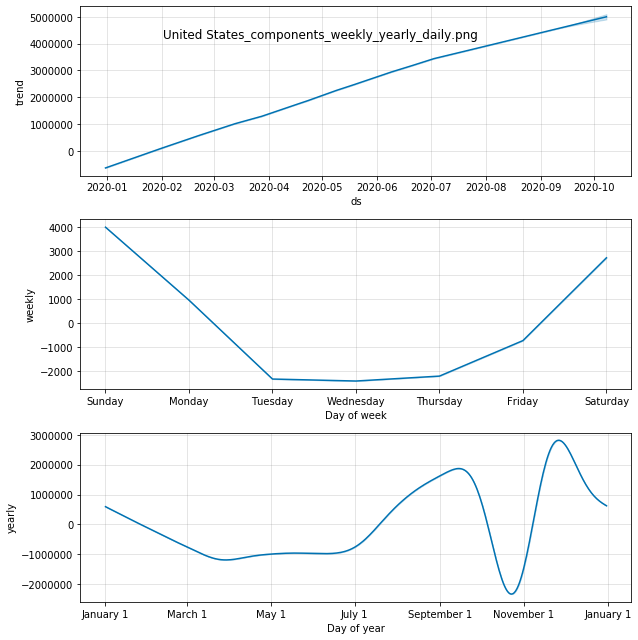

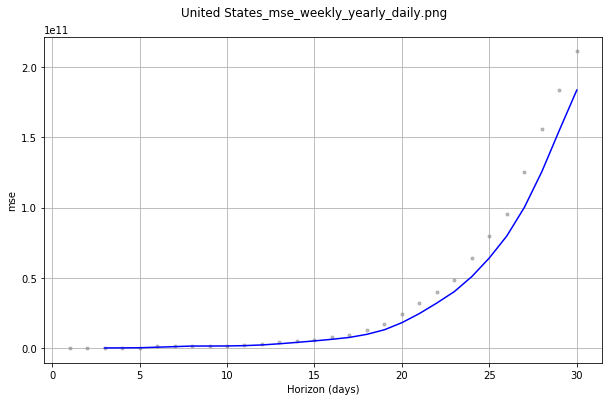

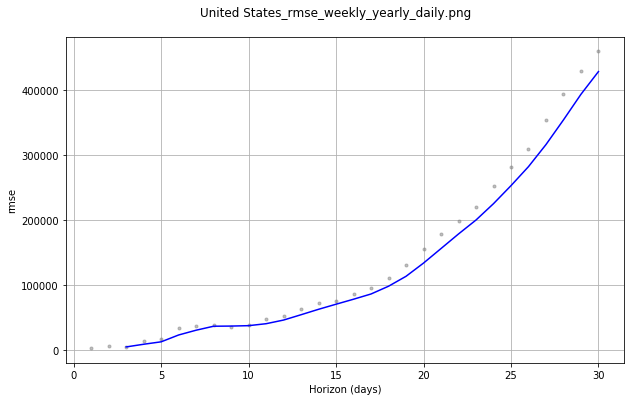

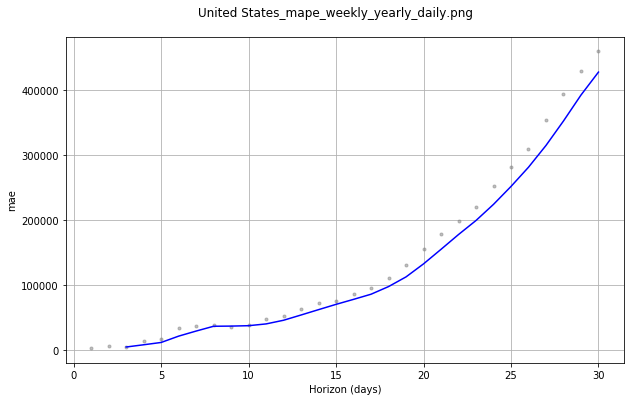

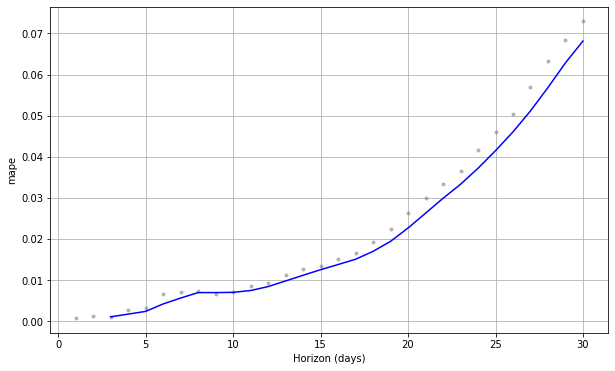

In [102]:
prophet_predicts(us_covid_df, 'United States', True,  False)
prophet_predicts(us_covid_df, 'United States',  False,  False)
prophet_predicts(us_covid_df, 'United States', False,  True)
prophet_predicts(us_covid_df, 'United States',  True,  True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00


   horizon           mse           rmse            mae      mape     mdape  \
0   3 days  3.089863e+08   17578.006963   15040.915973  0.002940  0.002618   
1   4 days  6.256561e+08   25013.117978   23824.749836  0.004620  0.005239   
2   5 days  1.125914e+09   33554.641424   33036.395107  0.006350  0.006004   
3   6 days  1.364070e+09   36933.316551   36706.841352  0.006984  0.007142   
4   7 days  1.897125e+09   43555.996068   43213.603990  0.008137  0.007807   
5   8 days  2.796544e+09   52882.361241   51609.267074  0.009616  0.009461   
6   9 days  4.963874e+09   70454.766838   68665.970071  0.012697  0.012244   
7  10 days  7.812226e+09   88386.797102   86905.635372  0.015955  0.016387   
8  11 days  1.101196e+10  104937.894851  104259.802569  0.018999  0.019233   
9  12 days  1.444673e+10  120194.563717  119580.114507  0.021615  0.021379   
10 13 days  1.794520e+10  133959.682735  133437.894085  0.023918  0.024234   
11 14 days  2.219668e+10  148985.514257  148529.323389  0.026407

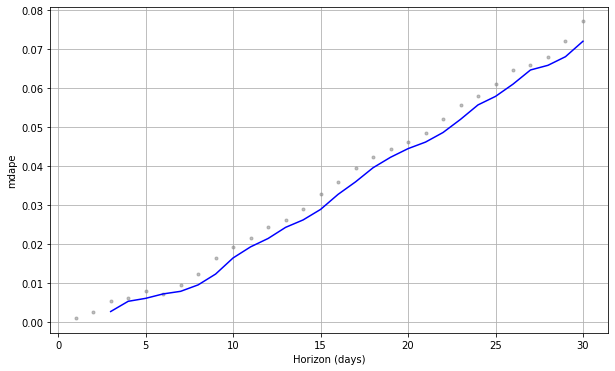

In [45]:
prophet_predicts(us_covid_df, 'United States')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-09 00:00:00 and 2020-08-09 00:00:00


   horizon           mse           rmse            mae      mape     mdape  \
0   3 days  3.089863e+08   17578.006963   15040.915973  0.002940  0.002618   
1   4 days  6.256561e+08   25013.117978   23824.749836  0.004620  0.005239   
2   5 days  1.125914e+09   33554.641424   33036.395107  0.006350  0.006004   
3   6 days  1.364070e+09   36933.316551   36706.841352  0.006984  0.007142   
4   7 days  1.897125e+09   43555.996068   43213.603990  0.008137  0.007807   
5   8 days  2.796544e+09   52882.361241   51609.267074  0.009616  0.009461   
6   9 days  4.963874e+09   70454.766838   68665.970071  0.012697  0.012244   
7  10 days  7.812226e+09   88386.797102   86905.635372  0.015955  0.016387   
8  11 days  1.101196e+10  104937.894851  104259.802569  0.018999  0.019233   
9  12 days  1.444673e+10  120194.563717  119580.114507  0.021615  0.021379   
10 13 days  1.794520e+10  133959.682735  133437.894085  0.023918  0.024234   
11 14 days  2.219668e+10  148985.514257  148529.323389  0.026407

{'_stale': True,
 'stale_callback': None,
 'figure': None,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 'callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f8190d29f10>,
 'bbox_inches': Bbox([[0.0, 0.0], [10.0, 6.0]]),
 'dpi_scale_trans': <matplotlib.transforms.Affine2D at 0x7f81913a0910>,
 '_dpi': 72.0,
 'bbox': <matplotlib.transforms.TransformedBbox at 0x7f82106f4e10>,
 'transFigure': <matplotlib.transforms.BboxTransformTo at 0x7f81c0b2cd50>,
 'patch': <matplotlib.patches.Rectangle at 0x7f81c0b2cf10>,
 'canvas': <matplotlib.backen

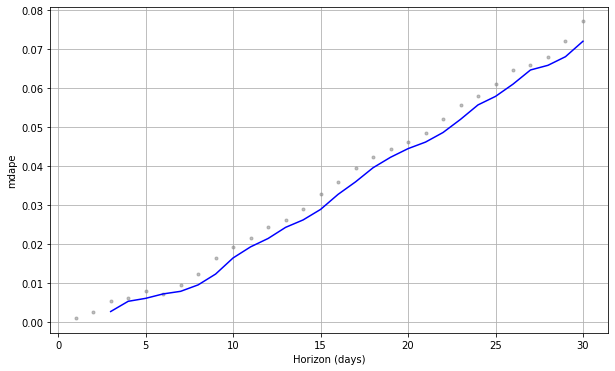

In [64]:
location_df = us_covid_df
location = 'United States'
num_rows = str(location_df.shape[0] - 31) + ' days'
prophet_df = location_df[['date','total_cases']]
prophet_df = prophet_df.rename(columns={'date':'ds','total_cases': 'y'})
m = Prophet(interval_width = 0.95, yearly_seasonality = False, weekly_seasonality = True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast_cv = cross_validation(m, initial = num_rows, period = '30 days', horizon = '30 days' ) # of rows - 31 days
forecast_pf = performance_metrics(forecast_cv)
print(forecast_pf)
x = plot_cross_validation_metric(forecast_cv, metric = 'mdape')
x.__dict__


In [65]:
x.suptitle('test')

Text(0.5, 0.98, 'test')

In [87]:
help(x.suptitle('test'))

Help on Text in module matplotlib.text object:

class Text(matplotlib.artist.Artist)
 |  Text(x=0, y=0, text='', color=None, verticalalignment='baseline', horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, **kwargs)
 |  
 |  Handle storing and drawing of text in window or data coordinates.
 |  
 |  Method resolution order:
 |      Text
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, x=0, y=0, text='', color=None, verticalalignment='baseline', horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, **kwargs)
 |      Create a `.Text` instance at *x*, *y* with string *text*.
 |      
 |      Valid kwargs are
 |        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns 

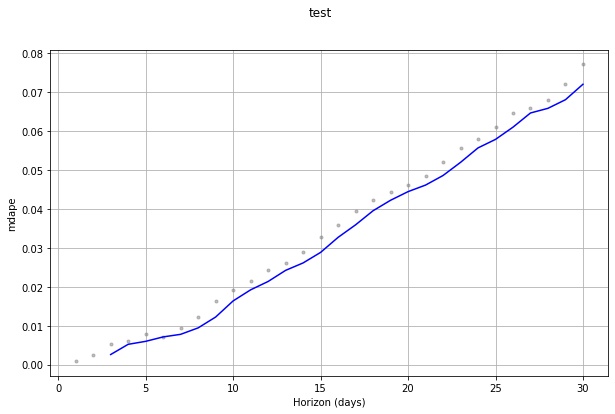

In [88]:
x.suptitle('test')

x

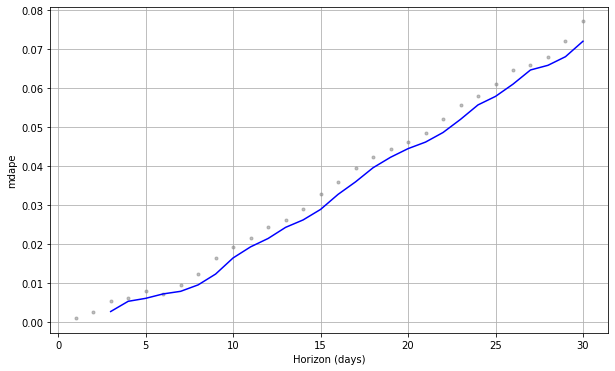

In [51]:
x